
### Exercise

    Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
    Figure out if any preprocessing such as scaling would help here
    Draw elbow plot and from that figure out optimal value of k



In [12]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [17]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
df=df[['petal length (cm)','petal width (cm)']]
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


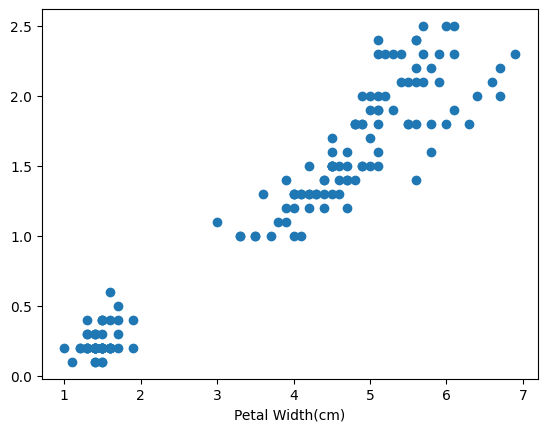

In [24]:
plt.xlabel("Petal Length(cm)")
plt.xlabel("Petal Width(cm)")
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.show()

In [29]:
Kmeans=KMeans(n_clusters=3)
y_predict=Kmeans.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [33]:
df['cluster']=y_predict
df

C:\Users\evilk\AppData\Local\Temp\ipykernel_14768\3273086133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=y_predict


,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


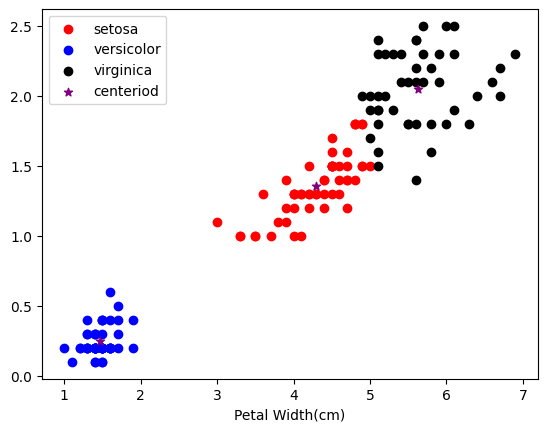

In [45]:
plt.xlabel("Petal Length(cm)")
plt.xlabel("Petal Width(cm)")
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red',label="setosa")
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',label='versicolor')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='black',label='virginica')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],color="purple",marker="*",label="centeriod")
plt.legend()
plt.show()

In [ ]:
Kmeans.cluster_centers_


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [52]:
sse=[]
K_cluster =range(1,15)
for i in K_cluster:
    km=KMeans(n_clusters=i)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

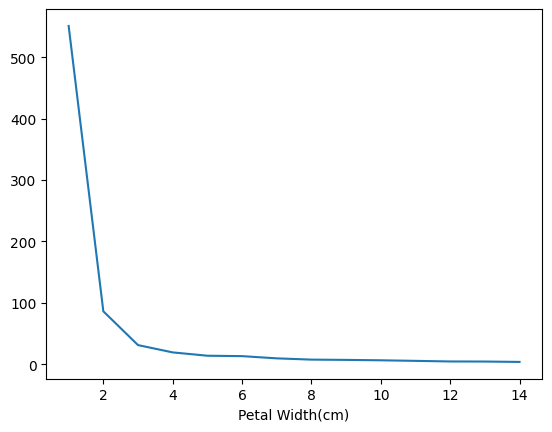

In [53]:
plt.xlabel("Petal Length(cm)")
plt.xlabel("Petal Width(cm)")
plt.plot(K_cluster,sse)
plt.show()
